In [48]:
# from google.colab import drive
# drive.mount('/content/drive')

**Exploring the Dataset and Binary Classification**

In [49]:
import pandas as pd
data = pd.read_csv("IMDB Dataset.csv")

In [50]:
data.shape

(50000, 2)

In [51]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [52]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [53]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [54]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14652\2568826810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [55]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [56]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

# Comparison of different models

## 1. LSTM


In [57]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv("IMDB Dataset.csv")
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

# Split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14652\900028357.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [65]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]


# Building the model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

# Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

loss, lstm_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {lstm_accuracy}")


def predict_sentiment(review):
  # Tokenization and paddding of the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment


Epoch 1/10


c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 107s 211ms/step - accuracy: 0.7293 - loss: 0.5266 - val_accuracy: 0.8476 - val_loss: 0.3489
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 123s 246ms/step - accuracy: 0.8489 - loss: 0.3657 - val_accuracy: 0.8449 - val_loss: 0.3618
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 127s 255ms/step - accuracy: 0.8746 - loss: 0.3141 - val_accuracy: 0.8465 - val_loss: 0.3635
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 268ms/step - accuracy: 0.8794 - loss: 0.2962 - val_accuracy: 0.8654 - val_loss: 0.3394
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 282ms/step - accuracy: 0.9032 - loss: 0.2451 - val_accuracy: 0.8658 - val_loss: 0.3350
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 289ms/step - accuracy: 0.9167 - loss: 0.2164 - val_accuracy: 0.8406 - val_loss: 0.3732
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 291ms/step - accuracy: 0.9095 - loss: 0.2288 - val_accuracy: 0.8741 - val_loss: 0.3299
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 287ms/step - accuracy: 0.9343 - loss: 0.17

In [59]:
# Random Examples:
# 1
new_review1 = "The movie was absolutely fantastic, with brilliant acting and a gripping story!"
sentiment1 = predict_sentiment(new_review1)
print(f"The sentiment of the review is: {sentiment1}")

# 2
new_review2 = "I found the movie really boring and poorly directed."
sentiment2 = predict_sentiment(new_review2)
print(f"The sentiment of the review is: {sentiment2}")

# 3
new_review3 = "The film had some good moments, but overall, it was just okay."
sentiment3 = predict_sentiment(new_review3)
print(f"The sentiment of the review is: {sentiment3}")

# 4
new_review4 = "I loved every moment of the film; it was entertaining and beautifully shot!"
sentiment4 = predict_sentiment(new_review4)
print(f"The sentiment of the review is: {sentiment4}")

# 5
new_review5 = "The plot made no sense, and the characters were completely unrelatable."
sentiment5 = predict_sentiment(new_review5)
print(f"The sentiment of the review is: {sentiment5}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
The sentiment of the review is: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The sentiment of the review is: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The sentiment of the review is: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The sentiment of the review is: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The sentiment of the review is: negative


## 2. SVM and Logistic Regression on the original dataset

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [61]:
# Extract features and target
X = data['review']  # Features (text reviews)
Y = data['sentiment']  # Target labels (sentiment)

# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)

# Step 2: Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_tfidf, Y_train_tfidf)

# Predict and evaluate Logistic Regression
log_reg_preds = log_reg.predict(X_test_tfidf)
log_reg_acc = accuracy_score(Y_test_tfidf, log_reg_preds)
print("Logistic Regression Results")
print(f"Accuracy: {log_reg_acc}")
print(classification_report(Y_test_tfidf, log_reg_preds))

# Step 3: SVM
svm = LinearSVC()
svm.fit(X_train_tfidf, Y_train_tfidf)

# Predict and evaluate SVM
svm_preds = svm.predict(X_test_tfidf)
svm_acc = accuracy_score(Y_test_tfidf, svm_preds)
print("SVM Results")
print(f"Accuracy: {svm_acc}")
print(classification_report(Y_test_tfidf, svm_preds))

# Step 4: Compare with LSTM Results
print(f"LSTM Accuracy: {lstm_accuracy}")


Logistic Regression Results
Accuracy: 0.8954
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

SVM Results
Accuracy: 0.8891
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

LSTM Accuracy: 0.8801000118255615


# Models Comparison Visualisation

[0.8954, 0.8891, 0.8762000203132629]


C:\Users\aryan\AppData\Local\Temp\ipykernel_14652\1934884448.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


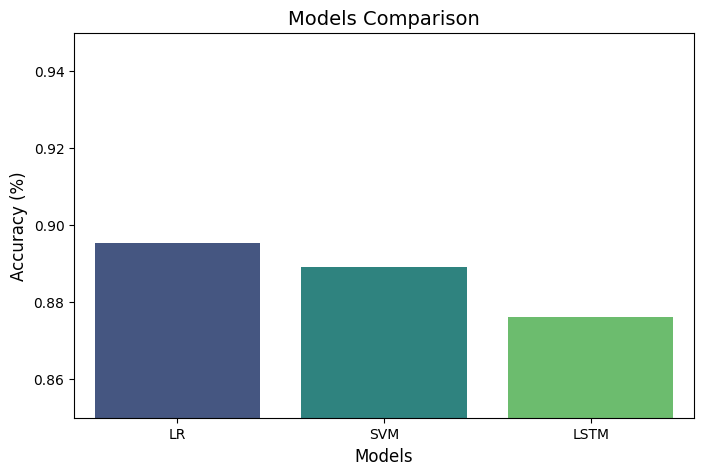

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['LR', 'SVM', 'LSTM']
accuracies = [log_reg_acc, svm_acc, lstm_accuracy]
print(accuracies)

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Models Comparison", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(.85, .95)
plt.savefig("performance_comparison.png")
plt.show()


# Vader Sentiment Analysis and SVC Predictor for Vader Analysis

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER analysis to each review
def vader_sentiment_analysis(review):
    sentiment = sia.polarity_scores(review)
    return sentiment

data['vader_sentiment'] = data['review'].apply(vader_sentiment_analysis)

# Get the compound score
data['compound'] = data['vader_sentiment'].apply(lambda x: x['compound'])

# Classify sentiment based on compound score
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['vader_label'] = data['compound'].apply(classify_sentiment)

# Display VADER sentiment analysis results
print("VADER Sentiment Analysis Results:")
print(data[['review', 'compound', 'vader_label']])

# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['review'])

# Add VADER compound score as an additional feature
X_features = pd.concat([pd.DataFrame(X_tfidf.toarray()), data['compound'].reset_index(drop=True)], axis=1)

# Convert X_features to a NumPy array to drop column names
X_features = X_features.to_numpy()

# Split the data again after ensuring column names are removed
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size=0.2, random_state=42)

# Step 2: LinearSVC
svc = LinearSVC()
svc.fit(X_train, Y_train)

# Predict and evaluate LinearSVC
svc_preds = svc.predict(X_test)
svc_acc = accuracy_score(Y_test, svc_preds)
print("LinearSVC Results")
print(f"Accuracy: {svc_acc}")
print(classification_report(Y_test, svc_preds))


VADER Sentiment Analysis Results:
                                                  review  compound vader_label
0      One of the other reviewers has mentioned that ...   -0.9951    Negative
1      A wonderful little production. <br /><br />The...    0.9641    Positive
2      I thought this was a wonderful way to spend ti...    0.9605    Positive
3      Basically there's a family where a little boy ...   -0.9213    Negative
4      Petter Mattei's "Love in the Time of Money" is...    0.9744    Positive
...                                                  ...       ...         ...
49995  I thought this movie did a down right good job...    0.9890    Positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...   -0.6693    Negative
49997  I am a Catholic taught in parochial elementary...   -0.9851    Negative
49998  I'm going to have to disagree with the previou...   -0.7648    Negative
49999  No one expects the Star Trek movies to be high...    0.4329    Positive

[50000 rows x 3 c